## Random Resample

In [1]:
import numpy as np

types_df = {
    'id': np.dtype(int), 
    'click': np.dtype(int),       
    'hour': np.dtype(int),       
    'C1': np.dtype(int),          
    'banner_pos': np.dtype(int),  
    'site_id': np.dtype(str),     
    'site_domain': np.dtype(str),  
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),       
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str), 
    'device_id': np.dtype(str),    
    'device_ip': np.dtype(str),    
    'device_model': np.dtype(str),  
    'device_type': np.dtype(int),   
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),   
    'C15': np.dtype(int),  
    'C16': np.dtype(int),   
    'C17': np.dtype(int),   
    'C18': np.dtype(int),   
    'C19': np.dtype(int),   
    'C20': np.dtype(int),   
    'C21':np.dtype(int)   
}

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt


m = 40428967  
sample_size= 1200000
value = sorted(random.sample(range(1,m),m-sample_size))

parser = lambda n :pd.datetime.strptime(n,'%y%m%d%H')


df = pd.read_csv('./train.csv',parse_dates=['hour'],date_parser=parser,dtype=types_df,skiprows=value)

df.head()

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,-1808458043,0,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
1,1467854271,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79
2,39309467,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100084,79
3,-1036648431,1,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
4,1948241392,1,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21300,320,50,2446,3,171,100228,156


In [4]:
df.shape

(1200000, 24)


## EDA


In [5]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1200000 non-null  int32         
 1   click             1200000 non-null  int32         
 2   hour              1200000 non-null  datetime64[ns]
 3   C1                1200000 non-null  int32         
 4   banner_pos        1200000 non-null  int32         
 5   site_id           1200000 non-null  object        
 6   site_domain       1200000 non-null  object        
 7   site_category     1200000 non-null  object        
 8   app_id            1200000 non-null  object        
 9   app_domain        1200000 non-null  object        
 10  app_category      1200000 non-null  object        
 11  device_id         1200000 non-null  object        
 12  device_ip         1200000 non-null  object        
 13  device_model      1200000 non-null  object

In [7]:
df.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.296034e+06,1.703450e-01,1.004967e+03,2.878008e-01,1.015247e+00,3.307458e-01,1.884169e+04,3.188848e+02,6.014064e+01,2.112600e+03,1.432992e+00,2.271950e+02,5.313234e+04,8.343064e+01
std,1.239939e+09,3.759358e-01,1.094170e+00,5.050430e-01,5.277541e-01,8.541820e-01,4.959054e+03,2.131548e+01,4.735919e+01,6.094253e+02,1.326169e+00,3.512091e+02,4.996209e+04,7.034052e+01
min,-2.147484e+09,0.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,-1.071986e+09,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,6.112205e+05,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000460e+05,6.100000e+01
75%,1.073550e+09,0.000000e+00,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000870e+05,1.010000e+02
max,2.147484e+09,1.000000e+00,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02


In [8]:
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

0    995586
1    204414
Name: click, dtype: int64


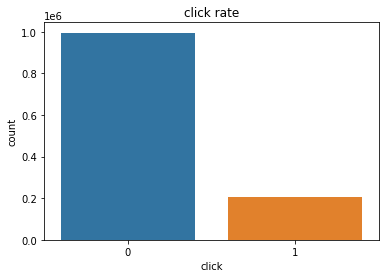

In [9]:
import seaborn as sns

print(df['click'].value_counts())

sns.countplot(x='click',data=df)

plt.title('click rate')
plt.show()

Text(0.5, 1.0, 'click_num and time')

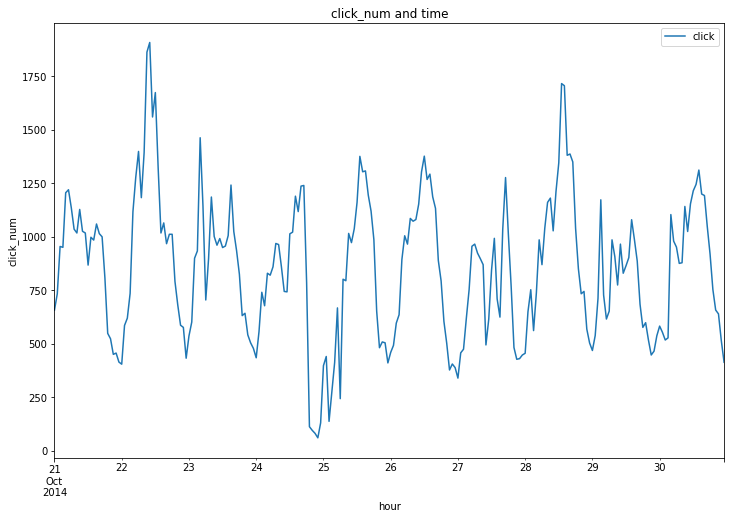

In [10]:
df.hour.describe()

df.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,8))

plt.ylabel('click_num')
plt.title('click_num and time')

## Features Engineering

In [11]:
df['time'] = df.hour.apply(lambda x : x.hour)
df.sample(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,time
396291,582677007,0,2014-10-24 00:00:00,1002,0,a187a464,b53723be,50e219e0,ecad2386,7801e8d9,...,0,21789,320,50,2512,2,303,-1,52,0
1143727,686134269,0,2014-10-30 12:00:00,1005,0,4e7614cf,c1aa3c04,f028772b,ecad2386,7801e8d9,...,0,23990,320,50,2747,0,35,100076,76,12
267445,-1071594879,0,2014-10-22 20:00:00,1005,1,a7853007,7e091613,f028772b,ecad2386,7801e8d9,...,0,9478,320,50,906,3,1451,100156,61,20
1199479,-349287938,0,2014-10-30 23:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,0,19743,320,50,2264,3,425,100000,61,23
924724,-1853978925,0,2014-10-28 17:00:00,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,0,17654,300,250,1994,2,39,-1,33,17
1191338,-1468880556,0,2014-10-30 21:00:00,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,0,6393,320,50,547,3,47,-1,23,21
46024,2128228734,0,2014-10-21 07:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15707,320,50,1722,0,35,-1,79,7
337412,1681506377,0,2014-10-23 11:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,2d925c20,d9b5648e,...,0,18648,320,50,1092,3,811,100156,61,11
1110480,1165363612,0,2014-10-30 07:00:00,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,...,0,6563,320,50,572,2,39,-1,32,7
428403,939128403,0,2014-10-24 08:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,22259,320,50,2545,0,39,100083,221,8


Text(0, 0.5, 'click_num')

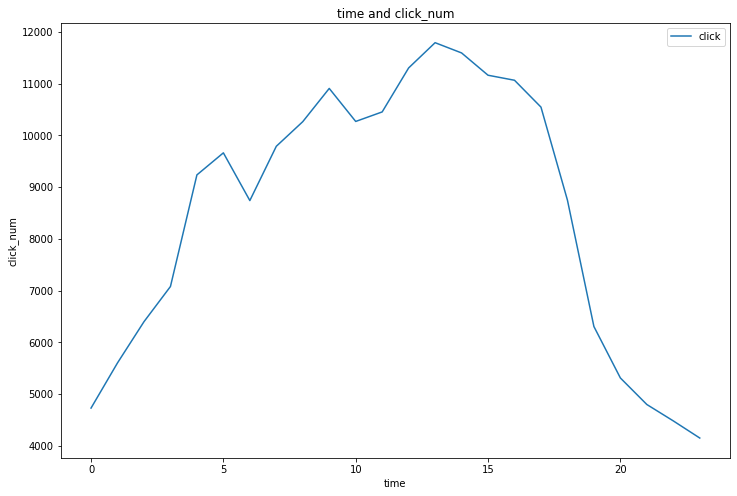

In [12]:
df.groupby('time').agg({'click':'sum'}).plot(figsize=(12,8))

plt.title('time and click_num')
plt.ylabel('click_num')

Text(0.5, 1.0, 'Impression and click')

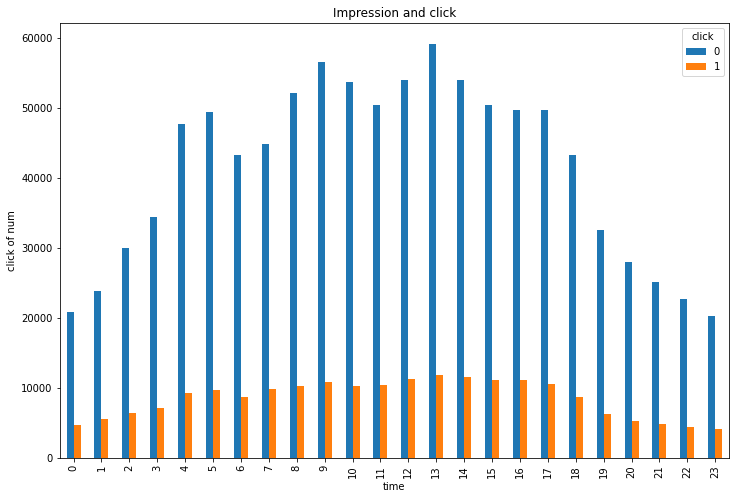

In [13]:
df.groupby(['time','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('Impression and click')

In [14]:
df_click_1 = df[df['click'] == 1]
df_hour = df[['time','click']].groupby(['time']).count().reset_index()
df_hour = df_hour.rename(columns={'click':'impression'})
df_hour['click'] = df_click_1[['time','click']].groupby(['time']).count().reset_index()['click']
df_hour['ctr'] = df_hour['click'] / df_hour['impression'] * 100

df_hour.head()

,time,impression,click,ctr
0,0,25533,4731,18.528963
1,1,29492,5604,19.001763
2,2,36372,6400,17.595953
3,3,41545,7080,17.041762
4,4,56883,9237,16.238595


Text(0.5, 1.0, 'ctr and time')

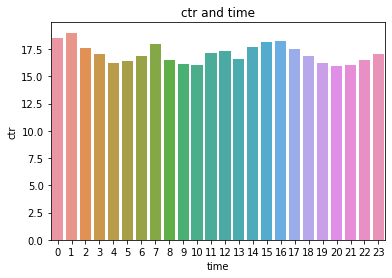

In [15]:
sns.barplot(y='ctr',x='time',data=df_hour)
plt.title('ctr and time')

Text(0, 0.5, 'click of num')

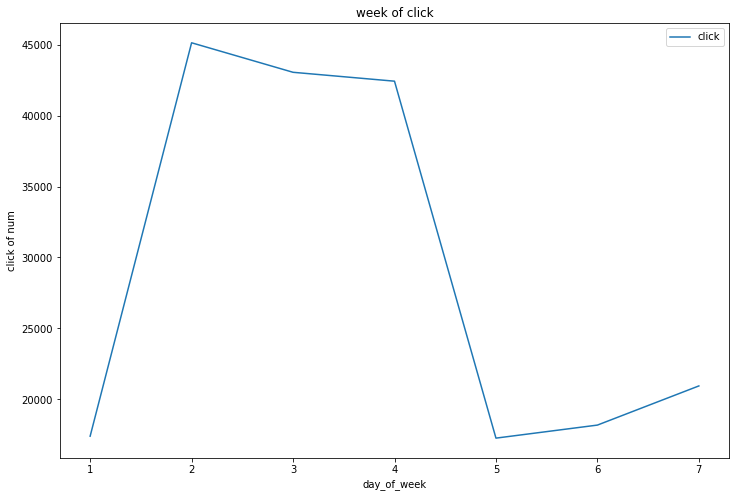

In [16]:
df['day_of_week'] = df.hour.apply(lambda x : x.weekday())
df['day_of_week'] = df['day_of_week'] + 1
df.groupby('day_of_week').agg({'click':'sum'}).plot(figsize=(12,8))
plt.title('week of click')
plt.ylabel('click of num')

Text(0.5, 1.0, 'Impression and click')

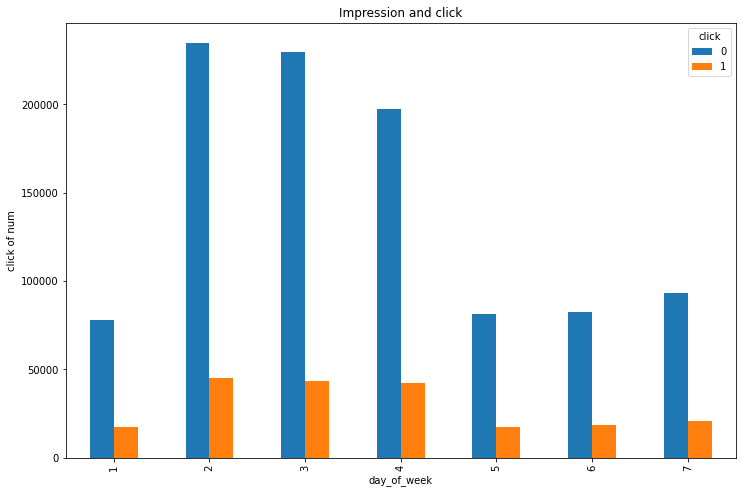

In [17]:
df.groupby(['day_of_week','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('Impression and click')

Text(0.5, 1.0, 'week of ctr')

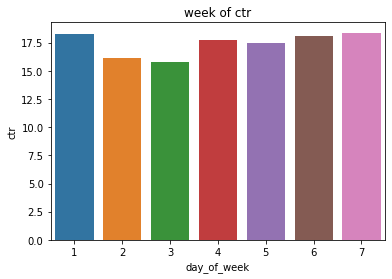

In [18]:
df_click_1 = df[df['click'] == 1]
df_dayweek = df[['day_of_week','click']].groupby('day_of_week').count().reset_index()
df_dayweek = df_dayweek.rename(columns={'click':'impression'})
df_dayweek['click'] = df_click_1[['day_of_week','click']].groupby('day_of_week').count().reset_index()['click']
df_dayweek['ctr'] = df_dayweek['click'] / df_dayweek['impression']*100
sns.barplot(x='day_of_week',y='ctr',data=df_dayweek)
plt.title('week of ctr')

In [19]:
df.C1.value_counts() / len(df)

1005    0.918578
1002    0.055067
1010    0.022375
1012    0.002753
1007    0.000858
1001    0.000236
1008    0.000132
Name: C1, dtype: float64

In [20]:
c1_values = df.C1.unique()
c1_values.sort()
ctr_list = []
for j in c1_values:
    ctr = df.loc[np.where((df.C1 == j))].click.mean()
    ctr_list.append(ctr)
    print('C1 values:{},click_rate:{}'.format(j,ctr))

C1 values:1001,click_rate:0.03180212014134275
C1 values:1002,click_rate:0.21037817224315614
C1 values:1005,click_rate:0.16989841185745364
C1 values:1007,click_rate:0.04466019417475728
C1 values:1008,click_rate:0.11392405063291139
C1 values:1010,click_rate:0.09683426443202979
C1 values:1012,click_rate:0.16979418886198547


Text(0, 0.5, 'click of num')

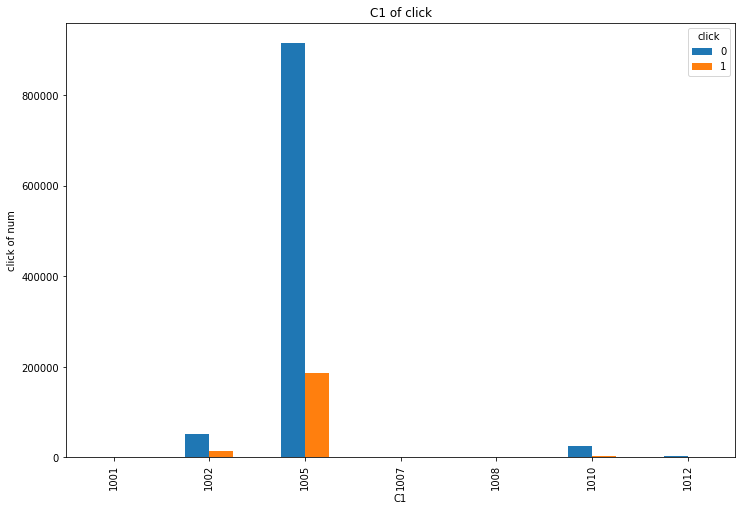

In [21]:
df.groupby(['C1','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.title('C1 of click')
plt.ylabel('click of num')

Text(0.5, 1.0, 'C1 of ctr')

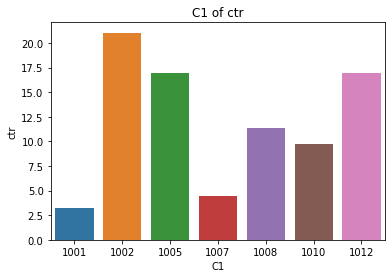

In [22]:
df_c1 = df[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click':'impression'})
df_c1['click'] = df_click_1[['C1','click']].groupby('C1').count().reset_index()['click']
df_c1['ctr'] = df_c1['click'] / df_c1['impression'] * 100
sns.barplot(x='C1',y='ctr',data=df_c1)
plt.title('C1 of ctr')

In [23]:
df.C15.value_counts() / len(df)

320     0.932600
300     0.058002
216     0.007322
728     0.001828
120     0.000084
1024    0.000074
480     0.000053
768     0.000037
Name: C15, dtype: float64

In [24]:
c15_value = df.C15.unique()
c15_value.sort()

ctr_list = []
for k in c15_value:
    ctr = df.loc[np.where((df.C15 == k))].click.mean()
    ctr_list.append(ctr)
    print('C15 values:{}, click rate:{}'.format(k,ctr))


C15 values:120, click rate:0.009900990099009901
C15 values:216, click rate:0.12315046665149101
C15 values:300, click rate:0.35869658917847186
C15 values:320, click rate:0.1592304667953392
C15 values:480, click rate:0.265625
C15 values:728, click rate:0.05241567912488605
C15 values:768, click rate:0.4318181818181818
C15 values:1024, click rate:0.1797752808988764


Text(0.5, 1.0, 'c15 of click')

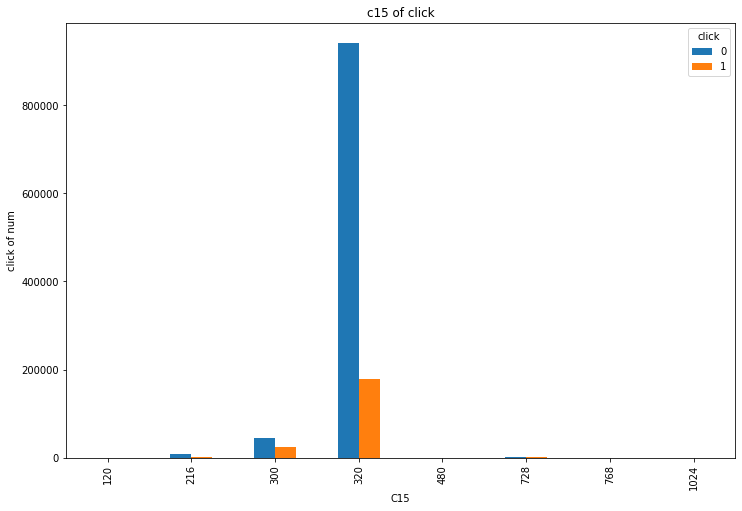

In [25]:
df.groupby(['C15','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('c15 of click')

<AxesSubplot:xlabel='C15', ylabel='ctr'>

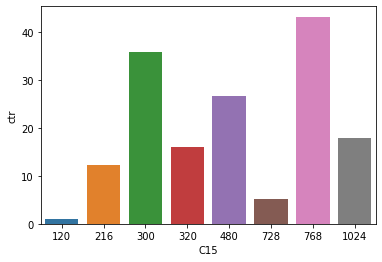

In [26]:
df_c15 = df[['C15','click']].groupby('C15').count().reset_index()
df_c15 = df_c15.rename(columns={'click':'impression'})
df_c15['click'] = df_click_1[['C15','click']].groupby('C15').count().reset_index()['click']
df_c15['ctr'] = df_c15['click'] / df_c15['impression'] * 100
sns.barplot(x='C15',y='ctr',data=df_c15)

In [27]:
df.banner_pos.value_counts() / len(df)

0    0.720002
1    0.278281
7    0.001059
2    0.000302
4    0.000172
5    0.000132
3    0.000053
Name: banner_pos, dtype: float64

In [28]:
banner_pos = df.banner_pos.unique()
banner_pos.sort()
ctr_list = []

for i in banner_pos:
    ctr = df.loc[np.where((df.banner_pos == i))].click.mean()
    ctr_list.append(ctr)
    print('banner_pos:{} , click:{}'.format(i,ctr))

banner_pos:0 , click:0.1649681771938292
banner_pos:1 , click:0.18369932053051924
banner_pos:2 , click:0.13259668508287292
banner_pos:3 , click:0.20634920634920634
banner_pos:4 , click:0.17475728155339806
banner_pos:5 , click:0.11392405063291139
banner_pos:7 , click:0.33202202989771834


Text(0, 0.5, 'click of num')

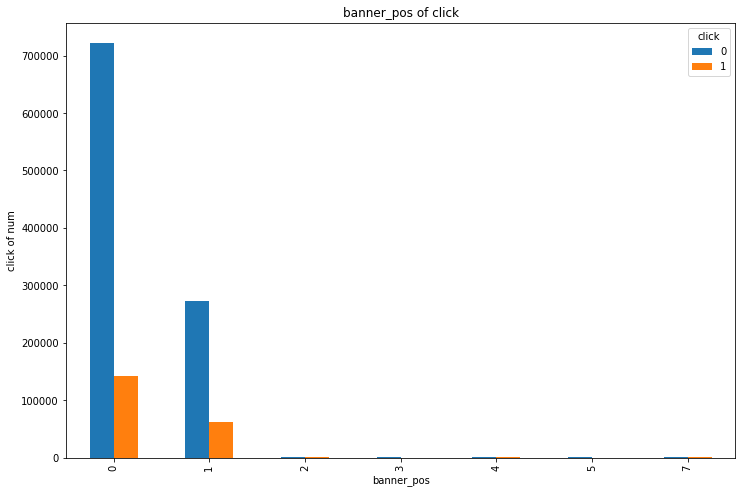

In [29]:
df.groupby(['banner_pos','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.title('banner_pos of click')
plt.ylabel('click of num')

Text(0.5, 1.0, 'banner_pos of ctr')

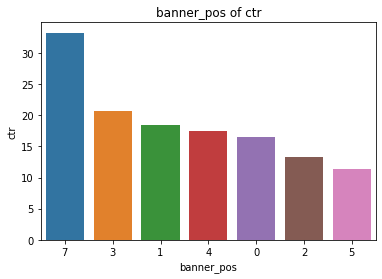

In [30]:
df_banner = df[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click':'impression'})
df_banner['click'] = df_click_1[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['ctr'] = df_banner['click'] / df_banner['impression'] * 100

sort_banner = df_banner.sort_values(by='ctr',ascending=False)['banner_pos'].tolist()
sns.barplot(x='banner_pos',y='ctr',data=df_banner,order=sort_banner)
plt.title('banner_pos of ctr')

In [31]:
df.device_type.value_counts() / len(df)

1    0.922556
0    0.055067
4    0.019187
5    0.003187
2    0.000002
Name: device_type, dtype: float64

Text(0.5, 1.0, 'device_type of click')

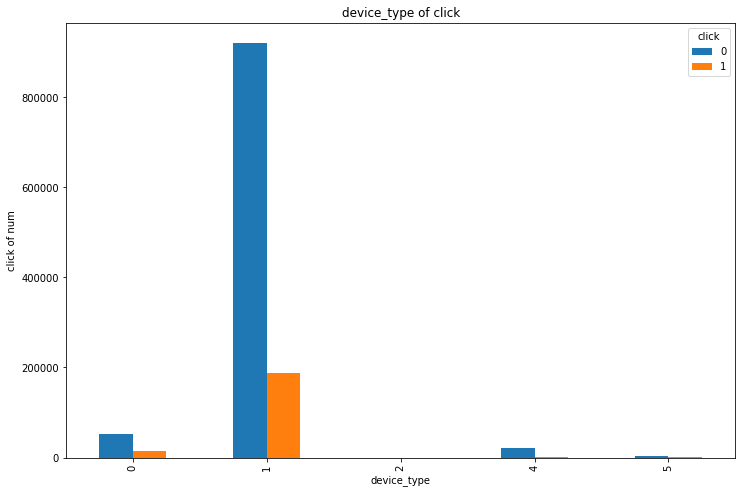

In [32]:
df[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('device_type of click')

Text(0.5, 1.0, 'device_type of click')

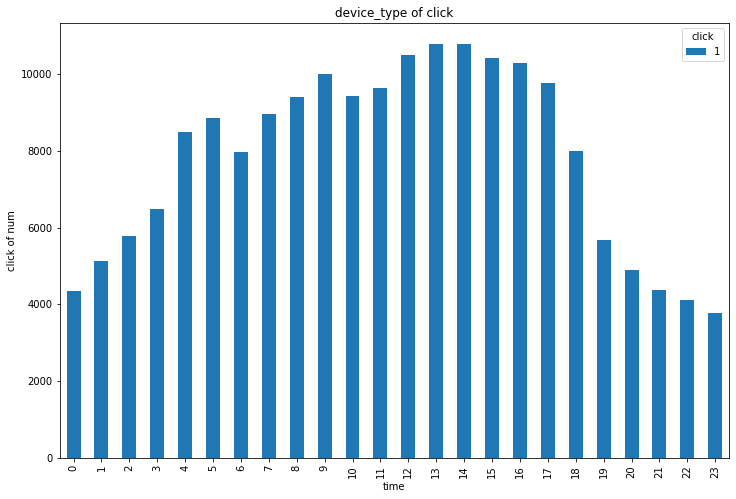

In [33]:
df_click_1[df_click_1['device_type'] == 1].groupby(['time','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('device_type of click')

In [34]:
device_click = df_click_1.groupby(['device_type']).agg({'click':'sum'}).reset_index()
device_impression = df.groupby(['device_type']).agg({'click':'count'}).rename(columns={'click':'impression'}).reset_index()
df_merge = pd.merge(left=device_click,right=device_impression,how='inner',on='device_type')
df_merge['ctr'] = df_merge['click'] / df_merge['impression'] * 100
df_merge

,device_type,click,impression,ctr
0,0,13902,66081,21.037817
1,1,187912,1107067,16.973860
2,4,2234,23025,9.702497
3,5,366,3825,9.568627


Text(0.5, 1.0, 'device_type of ctr')

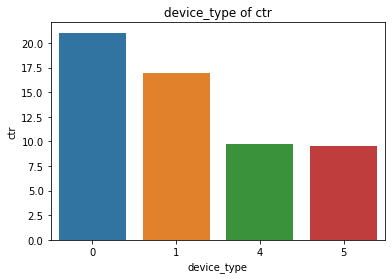

In [35]:
sns.barplot(x='device_type',y='ctr',data=df_merge)
plt.title('device_type of ctr')

## Build Model 1(LGB)

In [36]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,time,day_of_week
0,-1808458043,0,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,20352,320,50,2333,0,39,-1,157,0,2
1,1467854271,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15699,320,50,1722,0,35,-1,79,0,2
2,39309467,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15705,320,50,1722,0,35,100084,79,0,2
3,-1036648431,1,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,20362,320,50,2333,0,39,-1,157,0,2
4,1948241392,1,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,21300,320,50,2446,3,171,100228,156,0,2


In [37]:
obj_columns = df.columns
obj_list_type = df.dtypes
new_col = '_int'

for i in range(0,len(obj_columns)):
    if obj_list_type[i] == object:
        df[obj_columns[i]+new_col] = df[obj_columns[i]].map(lambda a :hash(a))
        df.drop([obj_columns[i]],axis=1,inplace=True)
df.head()
    

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,day_of_week,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
0,-1808458043,0,2014-10-21,1005,0,1,0,20352,320,50,...,2,-6606017080401197447,8645162827110364172,7637456116182298739,-719213742880471738,2909065883530345092,985959180450664055,-359805342213849902,-2194077224786136589,5490736090241540507
1,1467854271,0,2014-10-21,1005,0,1,0,15699,320,50,...,2,2310678620001891426,-5299941486463766932,5981601736110382644,-719213742880471738,2909065883530345092,985959180450664055,-359805342213849902,2710969359384509029,6868720524459905352
2,39309467,0,2014-10-21,1005,0,1,0,15705,320,50,...,2,2310678620001891426,-5299941486463766932,5981601736110382644,-719213742880471738,2909065883530345092,985959180450664055,-359805342213849902,-2996366213556662264,6868720524459905352
3,-1036648431,1,2014-10-21,1005,1,1,0,20362,320,50,...,2,-4199591138609296733,1239613346522956733,5174727347899999544,-719213742880471738,2909065883530345092,985959180450664055,-359805342213849902,897534989095975519,6987774222338283026
4,1948241392,1,2014-10-21,1002,0,0,0,21300,320,50,...,2,6186954484963515309,-7585035939953316489,5523590078052332245,-719213742880471738,2909065883530345092,985959180450664055,6197211013177658036,7042658278597505178,-7474860607704807197


In [38]:
df = df.drop(['hour'],axis=1)

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb


#df.drop(['hour'],axis=1,inplace=True)


x = df.loc[:,df.columns != 'click']
y = df.click.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lgb_t = lgb.Dataset(x_train,y_train)
lgb_ev = lgb.Dataset(x_test,y_test)

'''
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_iterations':100,
    'num_leaves': 31,
    'max_depth': 10,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 1, 
    'bagging_freq': 3, 
    'verbose': 0
}
'''

params = {'max_depth':[5,10,15],
         'learning_rate':[0.1,0.2,0.3],
         'feature_fraction':[0.5,0.6,0.7],
         'bagging_fraction':[1,2,3],
         'bagging_freq':[1,2,3]
         #'lambda_l1':[0.1,0.3,0.5],
         #'lambda_l2':[0,5,10] 
         }




gbm = lgb.LGBMRegressor(boosting_type='gbdt',learning_rate=0.1)
 
gr_gbm = GridSearchCV(gbm,param_grid=params,cv=2,scoring='neg_mean_squared_error')

gr_gbm.fit(x_train,y_train)


C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\David\Anaconda3\lib\site-packages\lightgbm\engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\David\Anaconda3\lib\site-packages\lightgbm\basic.py", line 1714, in __init__
    train_set.construct().handle,
  File "C:\Users\David\Anaconda3\lib\site-packages\lightgbm\basic.py", line 1085, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "C:\Users\David\Anaconda3\lib\site-packages\lightgbm\basic.py", line 887, in _lazy_init
    self.__init_from_np2d(data, params_str, ref_dataset)
  File "C:\Users\David\Anaconda3\lib\site-packages\lightgbm\basic.py", line 937, in __init_from_np2d
    ctypes.byref(self.handle)))
  File "C:\Users\Davi

GridSearchCV(cv=2, estimator=LGBMRegressor(),
             param_grid={'bagging_fraction': [1, 2, 3],
                         'bagging_freq': [1, 2, 3],
                         'feature_fraction': [0.5, 0.6, 0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 10, 15]},
             scoring='neg_mean_squared_error')

In [44]:
gr_gbm.best_params_

{'bagging_fraction': 1,
 'bagging_freq': 1,
 'feature_fraction': 0.5,
 'learning_rate': 0.3,
 'max_depth': 15}

In [45]:
pred = gr_gbm.predict(x_test)
print(pred)


[0.04338183 0.08385629 0.36773234 ... 0.13318253 0.21671003 0.25129412]


In [46]:
from sklearn.metrics import mean_squared_error

print('mse:',mean_squared_error(y_test,pred))

mse: 0.12609510455288048


## Build Model 2(XGB)

In [47]:
import xgboost as xgb

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",        
        "silent": 1,
}

xtrain  = xgb.DMatrix(x_train,y_train)
xtest = xgb.DMatrix(x_test,y_test)
eval_list = [(xtrain,'eval'),(xtest,'train')]


xgboost = xgb.train(params,xtrain,num_boost_round=4000,evals=eval_list,early_stopping_rounds=500,verbose_eval=True)

[17:06:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-logloss:0.57208	train-logloss:0.57239
Multiple eval metrics have been passed: 'train-logloss' will be used for early stopping.

Will train until train-logloss hasn't improved in 500 rounds.
[1]	eval-logloss:0.50787	train-logloss:0.50879
[2]	eval-logloss:0.47112	train-logloss:0.47234
[3]	eval-logloss:0.44943	train-logloss:0.45112
[4]	eval-logloss:0.43620	train-logloss:0.43809
[5]	eval-logloss:0.42760	train-logloss:0.42966
[6]	eval-logloss:0.42280	train-logloss:0.42503
[7]	eval-logloss:0.41905	train-logloss:0.42138
[8]	eval-logloss:0.41660	train-logloss:0.41905
[9]	eval-logloss:0.41500	train-logloss:0.

[159]	eval-logloss:0.39062	train-logloss:0.40277
[160]	eval-logloss:0.39056	train-logloss:0.40277
[161]	eval-logloss:0.39048	train-logloss:0.40276
[162]	eval-logloss:0.39038	train-logloss:0.40275
[163]	eval-logloss:0.39034	train-logloss:0.40275
[164]	eval-logloss:0.39023	train-logloss:0.40269
[165]	eval-logloss:0.39013	train-logloss:0.40265
[166]	eval-logloss:0.39007	train-logloss:0.40267
[167]	eval-logloss:0.39002	train-logloss:0.40265
[168]	eval-logloss:0.38998	train-logloss:0.40265
[169]	eval-logloss:0.38988	train-logloss:0.40263
[170]	eval-logloss:0.38980	train-logloss:0.40260
[171]	eval-logloss:0.38964	train-logloss:0.40252
[172]	eval-logloss:0.38955	train-logloss:0.40249
[173]	eval-logloss:0.38948	train-logloss:0.40251
[174]	eval-logloss:0.38943	train-logloss:0.40250
[175]	eval-logloss:0.38934	train-logloss:0.40250
[176]	eval-logloss:0.38928	train-logloss:0.40249
[177]	eval-logloss:0.38926	train-logloss:0.40249
[178]	eval-logloss:0.38920	train-logloss:0.40250
[179]	eval-logloss:0

[327]	eval-logloss:0.38063	train-logloss:0.40222
[328]	eval-logloss:0.38057	train-logloss:0.40221
[329]	eval-logloss:0.38050	train-logloss:0.40220
[330]	eval-logloss:0.38042	train-logloss:0.40219
[331]	eval-logloss:0.38033	train-logloss:0.40219
[332]	eval-logloss:0.38028	train-logloss:0.40220
[333]	eval-logloss:0.38023	train-logloss:0.40221
[334]	eval-logloss:0.38018	train-logloss:0.40221
[335]	eval-logloss:0.38014	train-logloss:0.40222
[336]	eval-logloss:0.38009	train-logloss:0.40222
[337]	eval-logloss:0.38002	train-logloss:0.40225
[338]	eval-logloss:0.37997	train-logloss:0.40224
[339]	eval-logloss:0.37993	train-logloss:0.40224
[340]	eval-logloss:0.37985	train-logloss:0.40225
[341]	eval-logloss:0.37979	train-logloss:0.40226
[342]	eval-logloss:0.37976	train-logloss:0.40227
[343]	eval-logloss:0.37972	train-logloss:0.40227
[344]	eval-logloss:0.37967	train-logloss:0.40229
[345]	eval-logloss:0.37963	train-logloss:0.40229
[346]	eval-logloss:0.37959	train-logloss:0.40230
[347]	eval-logloss:0

[495]	eval-logloss:0.37285	train-logloss:0.40265
[496]	eval-logloss:0.37281	train-logloss:0.40265
[497]	eval-logloss:0.37278	train-logloss:0.40266
[498]	eval-logloss:0.37272	train-logloss:0.40266
[499]	eval-logloss:0.37266	train-logloss:0.40266
[500]	eval-logloss:0.37264	train-logloss:0.40267
[501]	eval-logloss:0.37255	train-logloss:0.40266
[502]	eval-logloss:0.37248	train-logloss:0.40269
[503]	eval-logloss:0.37245	train-logloss:0.40269
[504]	eval-logloss:0.37240	train-logloss:0.40269
[505]	eval-logloss:0.37237	train-logloss:0.40270
[506]	eval-logloss:0.37231	train-logloss:0.40270
[507]	eval-logloss:0.37226	train-logloss:0.40272
[508]	eval-logloss:0.37221	train-logloss:0.40274
[509]	eval-logloss:0.37216	train-logloss:0.40274
[510]	eval-logloss:0.37208	train-logloss:0.40274
[511]	eval-logloss:0.37206	train-logloss:0.40275
[512]	eval-logloss:0.37201	train-logloss:0.40275
[513]	eval-logloss:0.37200	train-logloss:0.40276
[514]	eval-logloss:0.37196	train-logloss:0.40278
[515]	eval-logloss:0

[663]	eval-logloss:0.36614	train-logloss:0.40339
[664]	eval-logloss:0.36607	train-logloss:0.40342
[665]	eval-logloss:0.36603	train-logloss:0.40343
[666]	eval-logloss:0.36598	train-logloss:0.40345
[667]	eval-logloss:0.36595	train-logloss:0.40347
[668]	eval-logloss:0.36588	train-logloss:0.40346
[669]	eval-logloss:0.36586	train-logloss:0.40347
[670]	eval-logloss:0.36583	train-logloss:0.40349
[671]	eval-logloss:0.36579	train-logloss:0.40349
[672]	eval-logloss:0.36576	train-logloss:0.40350
[673]	eval-logloss:0.36569	train-logloss:0.40352
[674]	eval-logloss:0.36564	train-logloss:0.40351
[675]	eval-logloss:0.36562	train-logloss:0.40352
[676]	eval-logloss:0.36559	train-logloss:0.40353
[677]	eval-logloss:0.36557	train-logloss:0.40354
[678]	eval-logloss:0.36556	train-logloss:0.40354
[679]	eval-logloss:0.36555	train-logloss:0.40355
[680]	eval-logloss:0.36552	train-logloss:0.40355
[681]	eval-logloss:0.36552	train-logloss:0.40357
[682]	eval-logloss:0.36547	train-logloss:0.40357
[683]	eval-logloss:0

In [48]:
dtest = xgb.DMatrix(x_test)
pred = xgboost.predict(dtest)
pred

array([0.09585989, 0.03077817, 0.07625188, ..., 0.2401694 , 0.04278368,
       0.14415145], dtype=float32)

In [49]:
print('mae:',mean_squared_error(y_test,pred))

mae: 0.12656774070483462


## Test Parser

In [52]:
parser = lambda a : pd.datetime.strptime(a,'%y%m%d%H')
test_df = pd.read_csv('./test.csv',parse_dates=['hour'],date_parser = parser)

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [53]:
test_df['time'] = test_df.hour.apply(lambda a : a.hour)

In [54]:
test_df['day_of_week'] = test_df.hour.apply(lambda x : x.weekday())
test_df['day_of_week'] = test_df['day_of_week'] + 1

In [55]:
test_df.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,time,day_of_week
0,1.000017e+19,2014-10-31,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,8330,320,50,761,3,175,100075,23,0,5
1,1.000018e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,22676,320,50,2616,0,35,100083,51,0,5
2,1.000055e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,22676,320,50,2616,0,35,100083,51,0,5
3,1.000109e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,18648,320,50,1092,3,809,100156,61,0,5
4,1.000138e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,23160,320,50,2667,0,47,-1,221,0,5


In [56]:

test_columns = test_df.columns
test_dtypes = test_df.dtypes
new_type = '_int'

for i in range(0,len(test_columns)):
    if test_dtypes[i] == object:
        test_df[test_columns[i]+new_type] = test_df[test_columns[i]].map(lambda a : hash(a))
        test_df.drop([test_columns[i]],axis=1,inplace=True)
        

In [57]:
test_df = test_df.drop(['hour'],axis=1)

In [58]:
test_df.columns

Index(['id', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'time', 'day_of_week',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int'],
      dtype='object')

In [59]:
#test_df = test_df.drop(['time'],axis=1)
dtest = xgb.DMatrix(test_df)
test_pred = xgboost.predict(dtest)


In [60]:
gr_gbm_pred = gr_gbm.predict(test_df)
gr_gbm_pred

array([0.12300629, 0.21186498, 0.2323472 , ..., 0.32918768, 0.02706269,
       0.11382167])

In [ ]:
submit_df = pd.read_csv('./sampleSubmission.csv')
submit_df['click'] = gr_gbm_pred
submit_df.to_csv('./submit_4.csv',index=False)

In [62]:
#dtest = lgb.Dataset(test_df)
test1_pred = gr_gbm.predict(test_df)


In [ ]:
submit_df['click'] = test1_pred
submit_df.to_csv('./submit_2.csv',index=False)

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

lr = LinearRegression(normalize=True)
svr = SVR(kernel='rbf')
ridge = Ridge(random_state=1)

sr = StackingRegressor(regressors=[lr,svr],meta_regressor=ridge)

params = {'svr__C': [0.1, 1.0, 10.0],'svr__gamma': [0.1, 1.0, 10.0]}

sr_gr = GridSearchCV(estimator=sr,param_grid=params)
sr_gr.fit(x,y)

In [ ]:
sr_pred = sr.predict(test_df)

In [ ]:
submit_df['click'] = sr_pred

In [ ]:
submit_df.to_csv('./submit_3.csv',index=False)